In [1]:
import os.path
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import yt
import glob
import pandas as pd
import math
import scipy.integrate as integrate
from matplotlib.backends.backend_pdf import PdfPages
mpl.rcParams['figure.dpi'] = 300

In [2]:
center = 0.25
amplitude = 1.0
width = 0.0251646060
eta = 226.1946710304
t_final = 0.5
Lx = 1.0

In [3]:
def natural_sort(l):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split("([0-9]+)", key)]
    return sorted(l, key=alphanum_key)

In [4]:
root_dir = '/Users/dbeckers/ctv'

In [39]:
# methods = ['godunov_ppm','godunov_weno_z','mol_central_CFL_0.5']
methods = ['godunov_ppm']
# methods = ['godunov_weno_z']
# methods = ['mol_central_CFL_0.45']
# methods = ['godunov_ppm','godunov_weno_z']
# methods = ['mol_central','periodic_mol_central']


# grid_types = ['uniform','fine_to_coarse']
# grid_types = ['fine_to_coarse']
grid_types = ['uniform']
grid_sizes = [64*2**i for i in range(1)]
dx_list = [Lx/grid_size for grid_size in grid_sizes]
print(grid_sizes)
color_list = [
    "#EE2E2F",
    "#008C48",
    "#185AA9",
    "#F47D23",
    "#662C91",
    "#A21D21",
    "#B43894",
    "#010202",
]
linestyle_list = [
    "solid",
    "dashed",
    "dotted",
    "dashdot"
]
linewidth_list = [
    1.5,
    0.5
]

[64]


In [40]:
idx = 0
# fields = ["x","y","p"]
fields = ["x","y","velocityx"]

In [38]:
grid_type

'fine_to_coarse'

In [43]:
%%capture
fig1, ax1 = plt.subplots(figsize=(14, 6))
fig2, ax2 = plt.subplots(figsize=(14, 10))
fig3, ax3 = plt.subplots(figsize=(14, 10))
fig4, ax4 = plt.subplots(figsize=(14, 10))

# error_lists = [[[] for i in range(len(grid_types))] for j in range(len(methods))]

k = -1
for method in methods:
    k += 1
    g = -1
    for grid_type in grid_types:
        g += 1
        l = -1
        for grid_size in grid_sizes:
            l += 1
            case_dir = os.path.join(root_dir, method, grid_type, f'nx_{grid_size}')
            
            # Load plt files
            plt_files = natural_sort(glob.glob(os.path.join(case_dir, "plt*")))
            ds = yt.load(plt_files[idx])
            ray = ds.ortho_ray(0, (0, 0, 0))
            srt = np.argsort(ray["x"])
            df = pd.DataFrame({f: np.array(ray[f][srt]) for f in fields})
            t = ds.current_time.value.flatten()[0]
            df["time"] = t
            df["dx"] = [ray.fwidth[i][0].value.flatten()[0] for i in range(len(df["x"].values))]
            
            # Plot error
            error_file = os.path.join(case_dir,'ctv.log')
            with open(error_file) as f:
                lines = f.readlines()
                time = [float(line.split()[0]) for line in lines[1:]]
                for level in [0]:
                    error = [float(line.split()[level+1]) for line in lines[1:]]
                    ax1.plot(time, error, color=color_list[l], linestyle=linestyle_list[k], linewidth=linewidth_list[g],label=f'{method}; nx = {grid_size}; grid type = {grid_type}; level {level}')
            
#             # Plot zero distribution error (only once)
#             if k == 0 :
#                 t_zde = np.linspace(0, t_final, num=int(500/(l+1)))
#                 zde = zero_dist_error(df["x"].values,df["dx"],center,amplitude,width,eta,t_zde)
#                 ax1.plot(t_zde, zde, color=color_list[l], linewidth=0.5, linestyle=linestyle_list[0])
            
            # Plot scalar distribution
            ax2.plot(df["x"].values, df["velocityx"].values, color=color_list[l], label=f'{method}; nx = {grid_size}; grid type = {grid_type}; t = {t}', linewidth=linewidth_list[g], linestyle=linestyle_list[k])
            
            # Plot error distribution
#             ed = error_dist(df["x"].values,df["velocityx"].values,df["dx"],center,amplitude,width,eta,t)
#             ax3.plot(df["x"].values, ed, label=f'{method}; grid type = {grid_type}; nx = {grid_size}; t = {t}', color=color_list[l], linewidth=linewidth_list[g], linestyle=linestyle_list[k])
            
            # Plot error marker on fig 1
#             L2e = L2_error(df["x"].values,df["velocityx"].values,df["dx"],center,amplitude,width,eta,t)
#             ax1.plot([t], [L2e], marker='o', markersize=3, color='black')
            
            # Add error to list for log-log plot
#             error_lists[k][g].append(L2e)
            
#         ax4.plot(dx_list,error_lists[k][g],linestyle=linestyle_list[k],linewidth=linewidth_list[g],color='black',label=f'{method}; grid type = {grid_type}')


# x_exact = np.linspace(0, 1, num=10000)
# scalar_exact = [exact_sol(xi,center,amplitude,width,eta,t) for xi in x_exact]
# ax2.plot(x_exact, scalar_exact, label = f'exact solution; t = {t}', color="black", linestyle="dashed", linewidth=0.5)

ax4.plot(dx_list,[1e4*dx**2 for dx in dx_list],label='dx^2')
ax4.plot(dx_list,[1e6*dx**3 for dx in dx_list],label='dx^3')
ax4.plot(dx_list,[1e8*dx**4 for dx in dx_list],label='dx^4')


yt : [INFO     ] 2022-08-01 08:36:19,963 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-01 08:36:19,965 Parameters: domain_dimensions         = [64 64  4]
yt : [INFO     ] 2022-08-01 08:36:19,968 Parameters: domain_left_edge          = [ 0.      0.     -0.0625]
yt : [INFO     ] 2022-08-01 08:36:19,971 Parameters: domain_right_edge         = [2.     2.     0.0625]


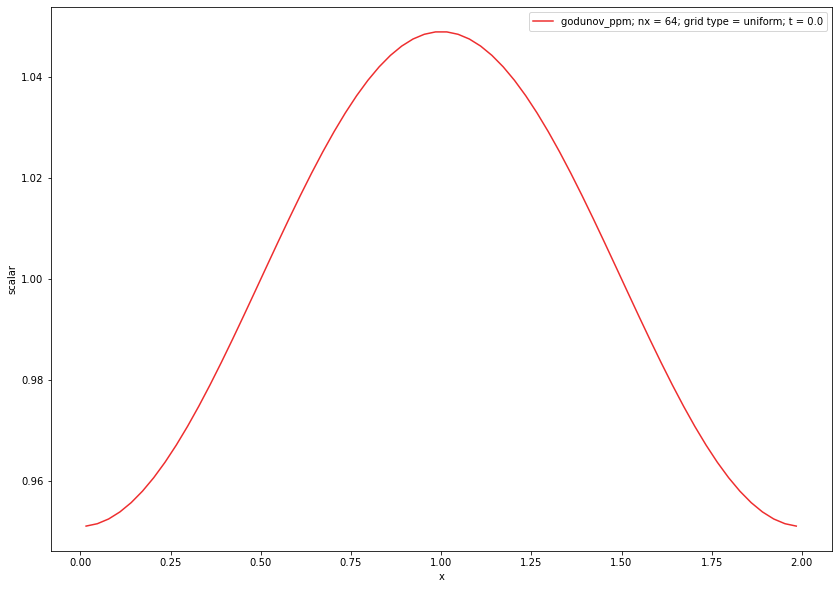

In [44]:
ax2.set_xlabel('x')
ax2.set_ylabel('scalar')
ax2.set_title('')
ax2.legend()
fig2

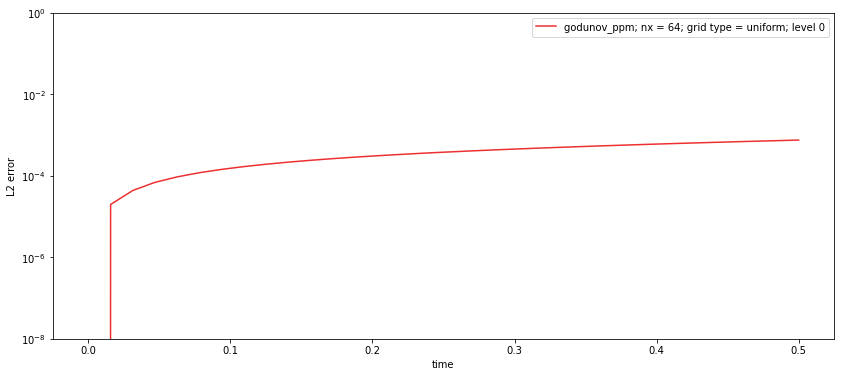

In [45]:
ax1.set_xlabel('time')
ax1.set_ylabel('L2 error')
ax1.set_title('')
ax1.legend()
ax1.set_yscale('log')
ax1.set_ylim([1e-8,1])
fig1

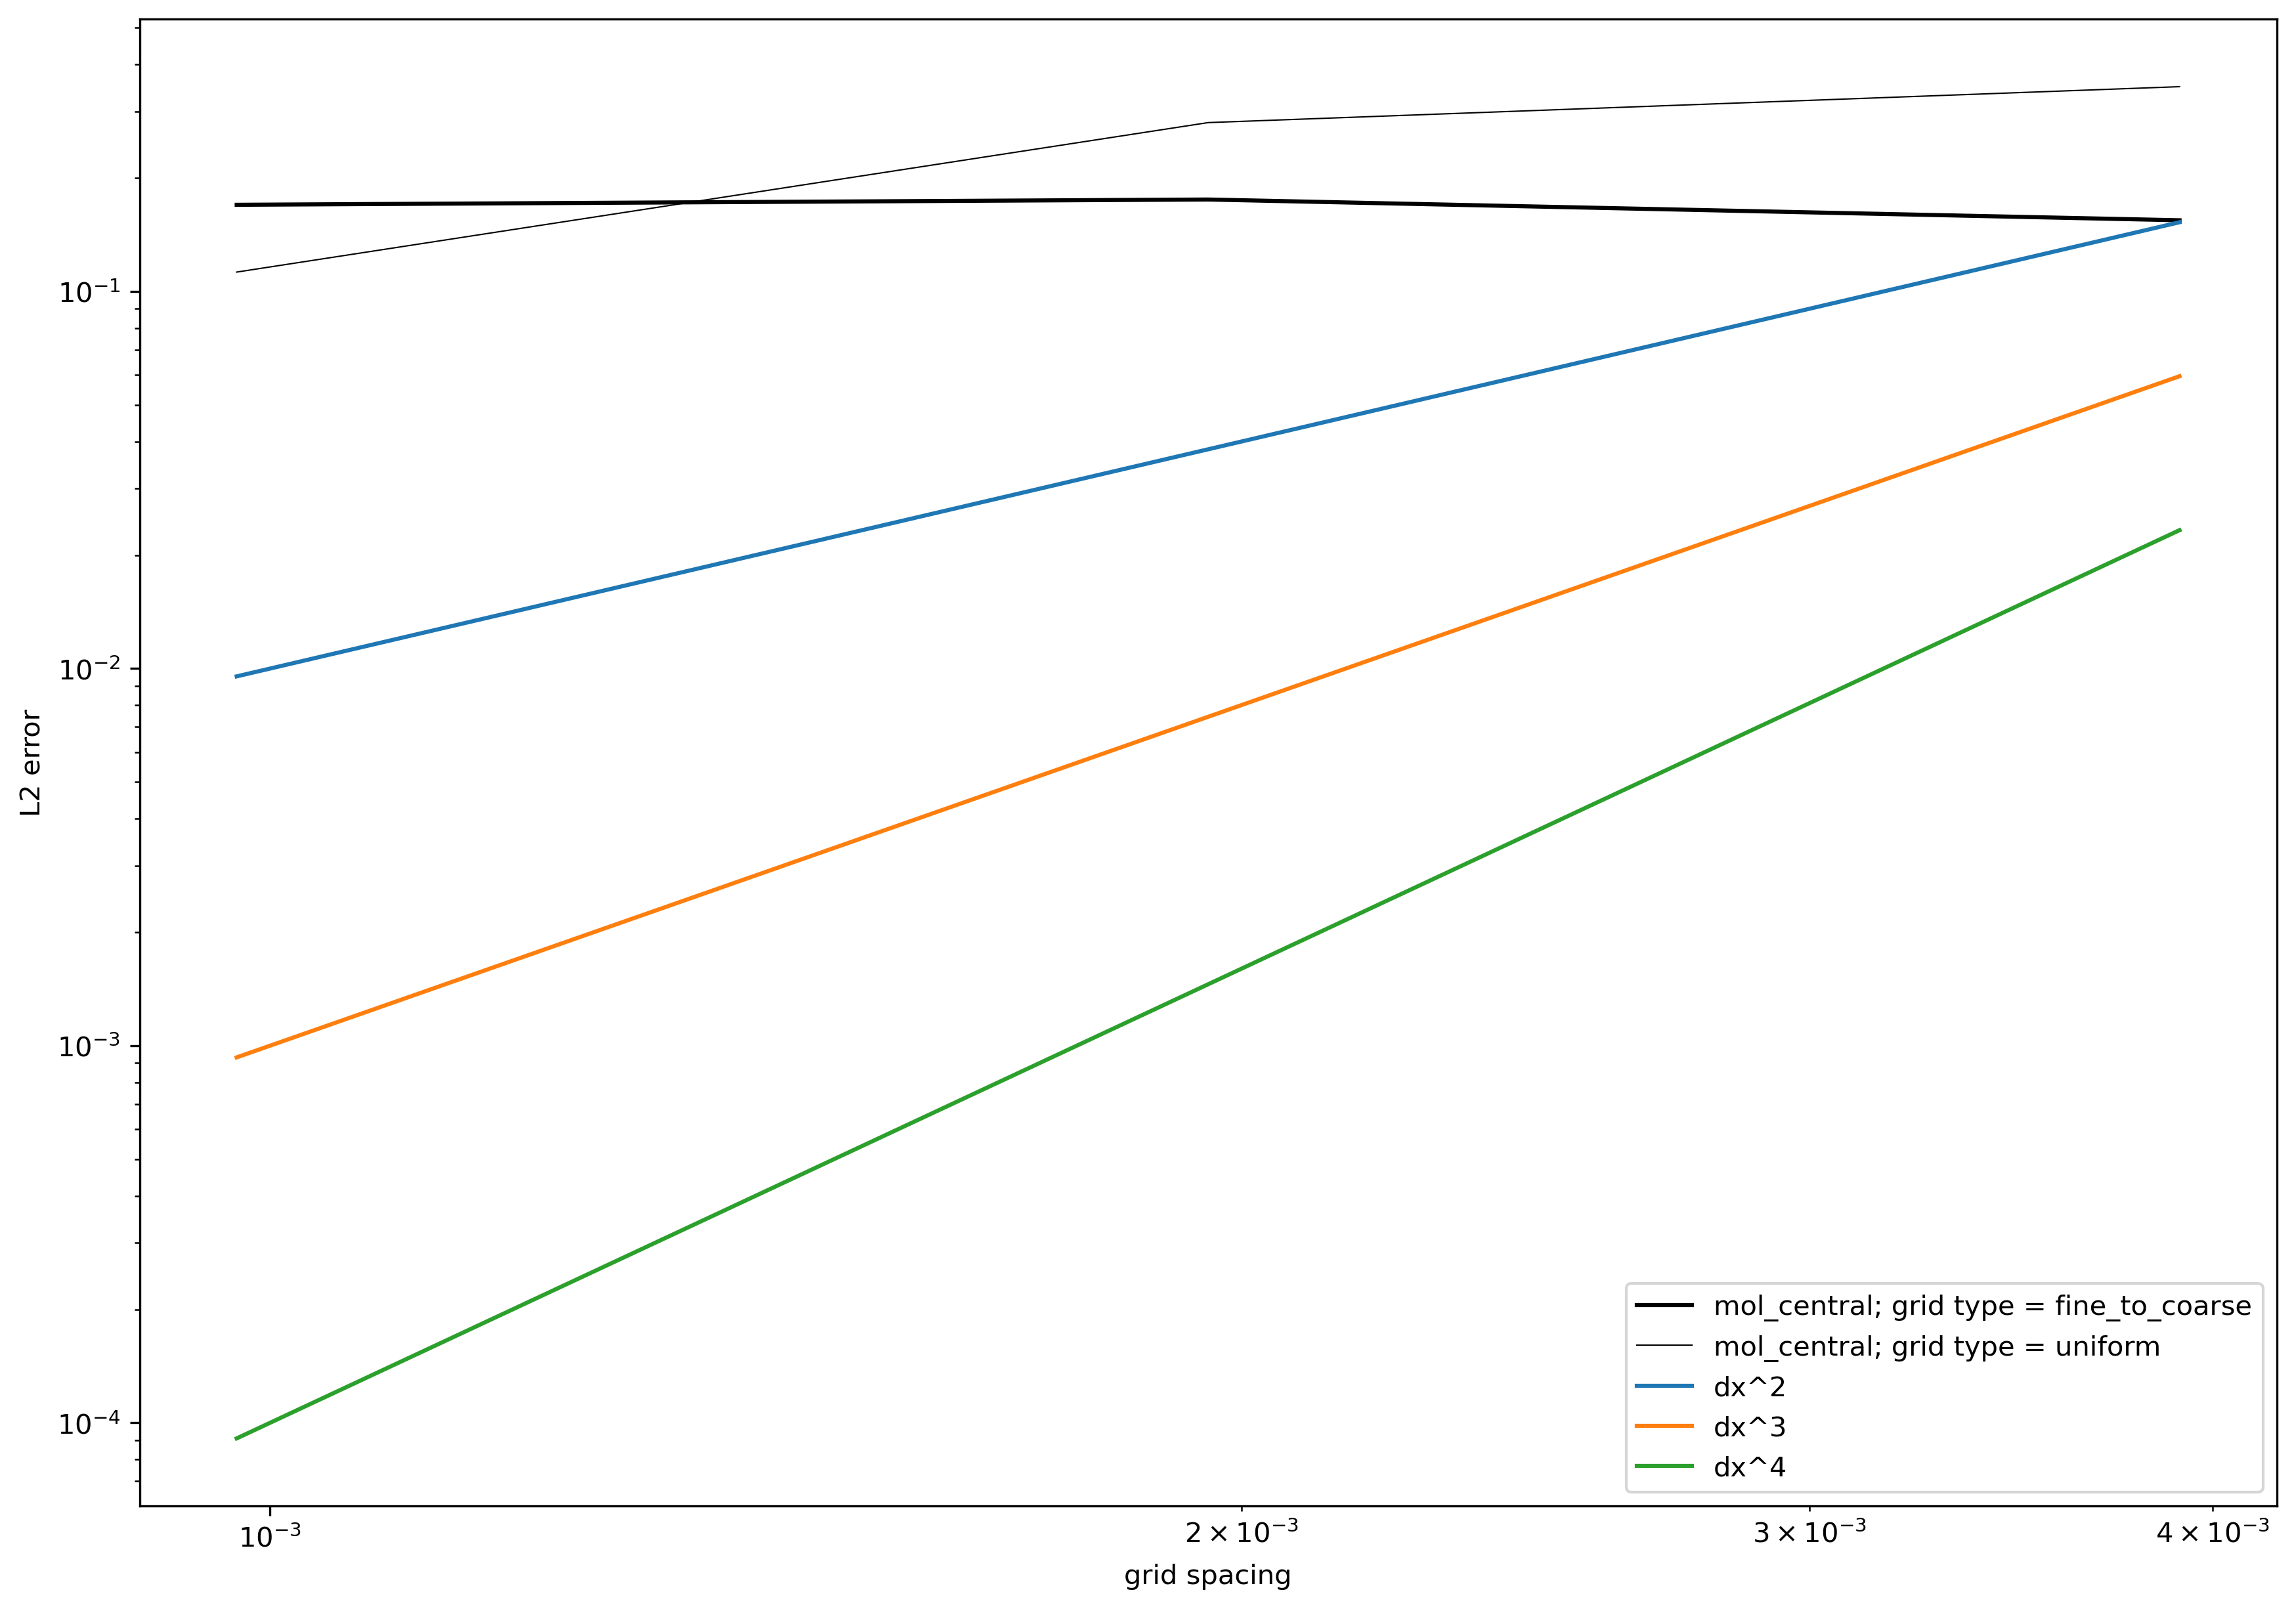

In [396]:
ax4.set_xlabel('grid spacing')
ax4.set_ylabel('L2 error')
ax4.set_title('')
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.legend()

# ax4.set_ylim([1e-4,1])
fig4

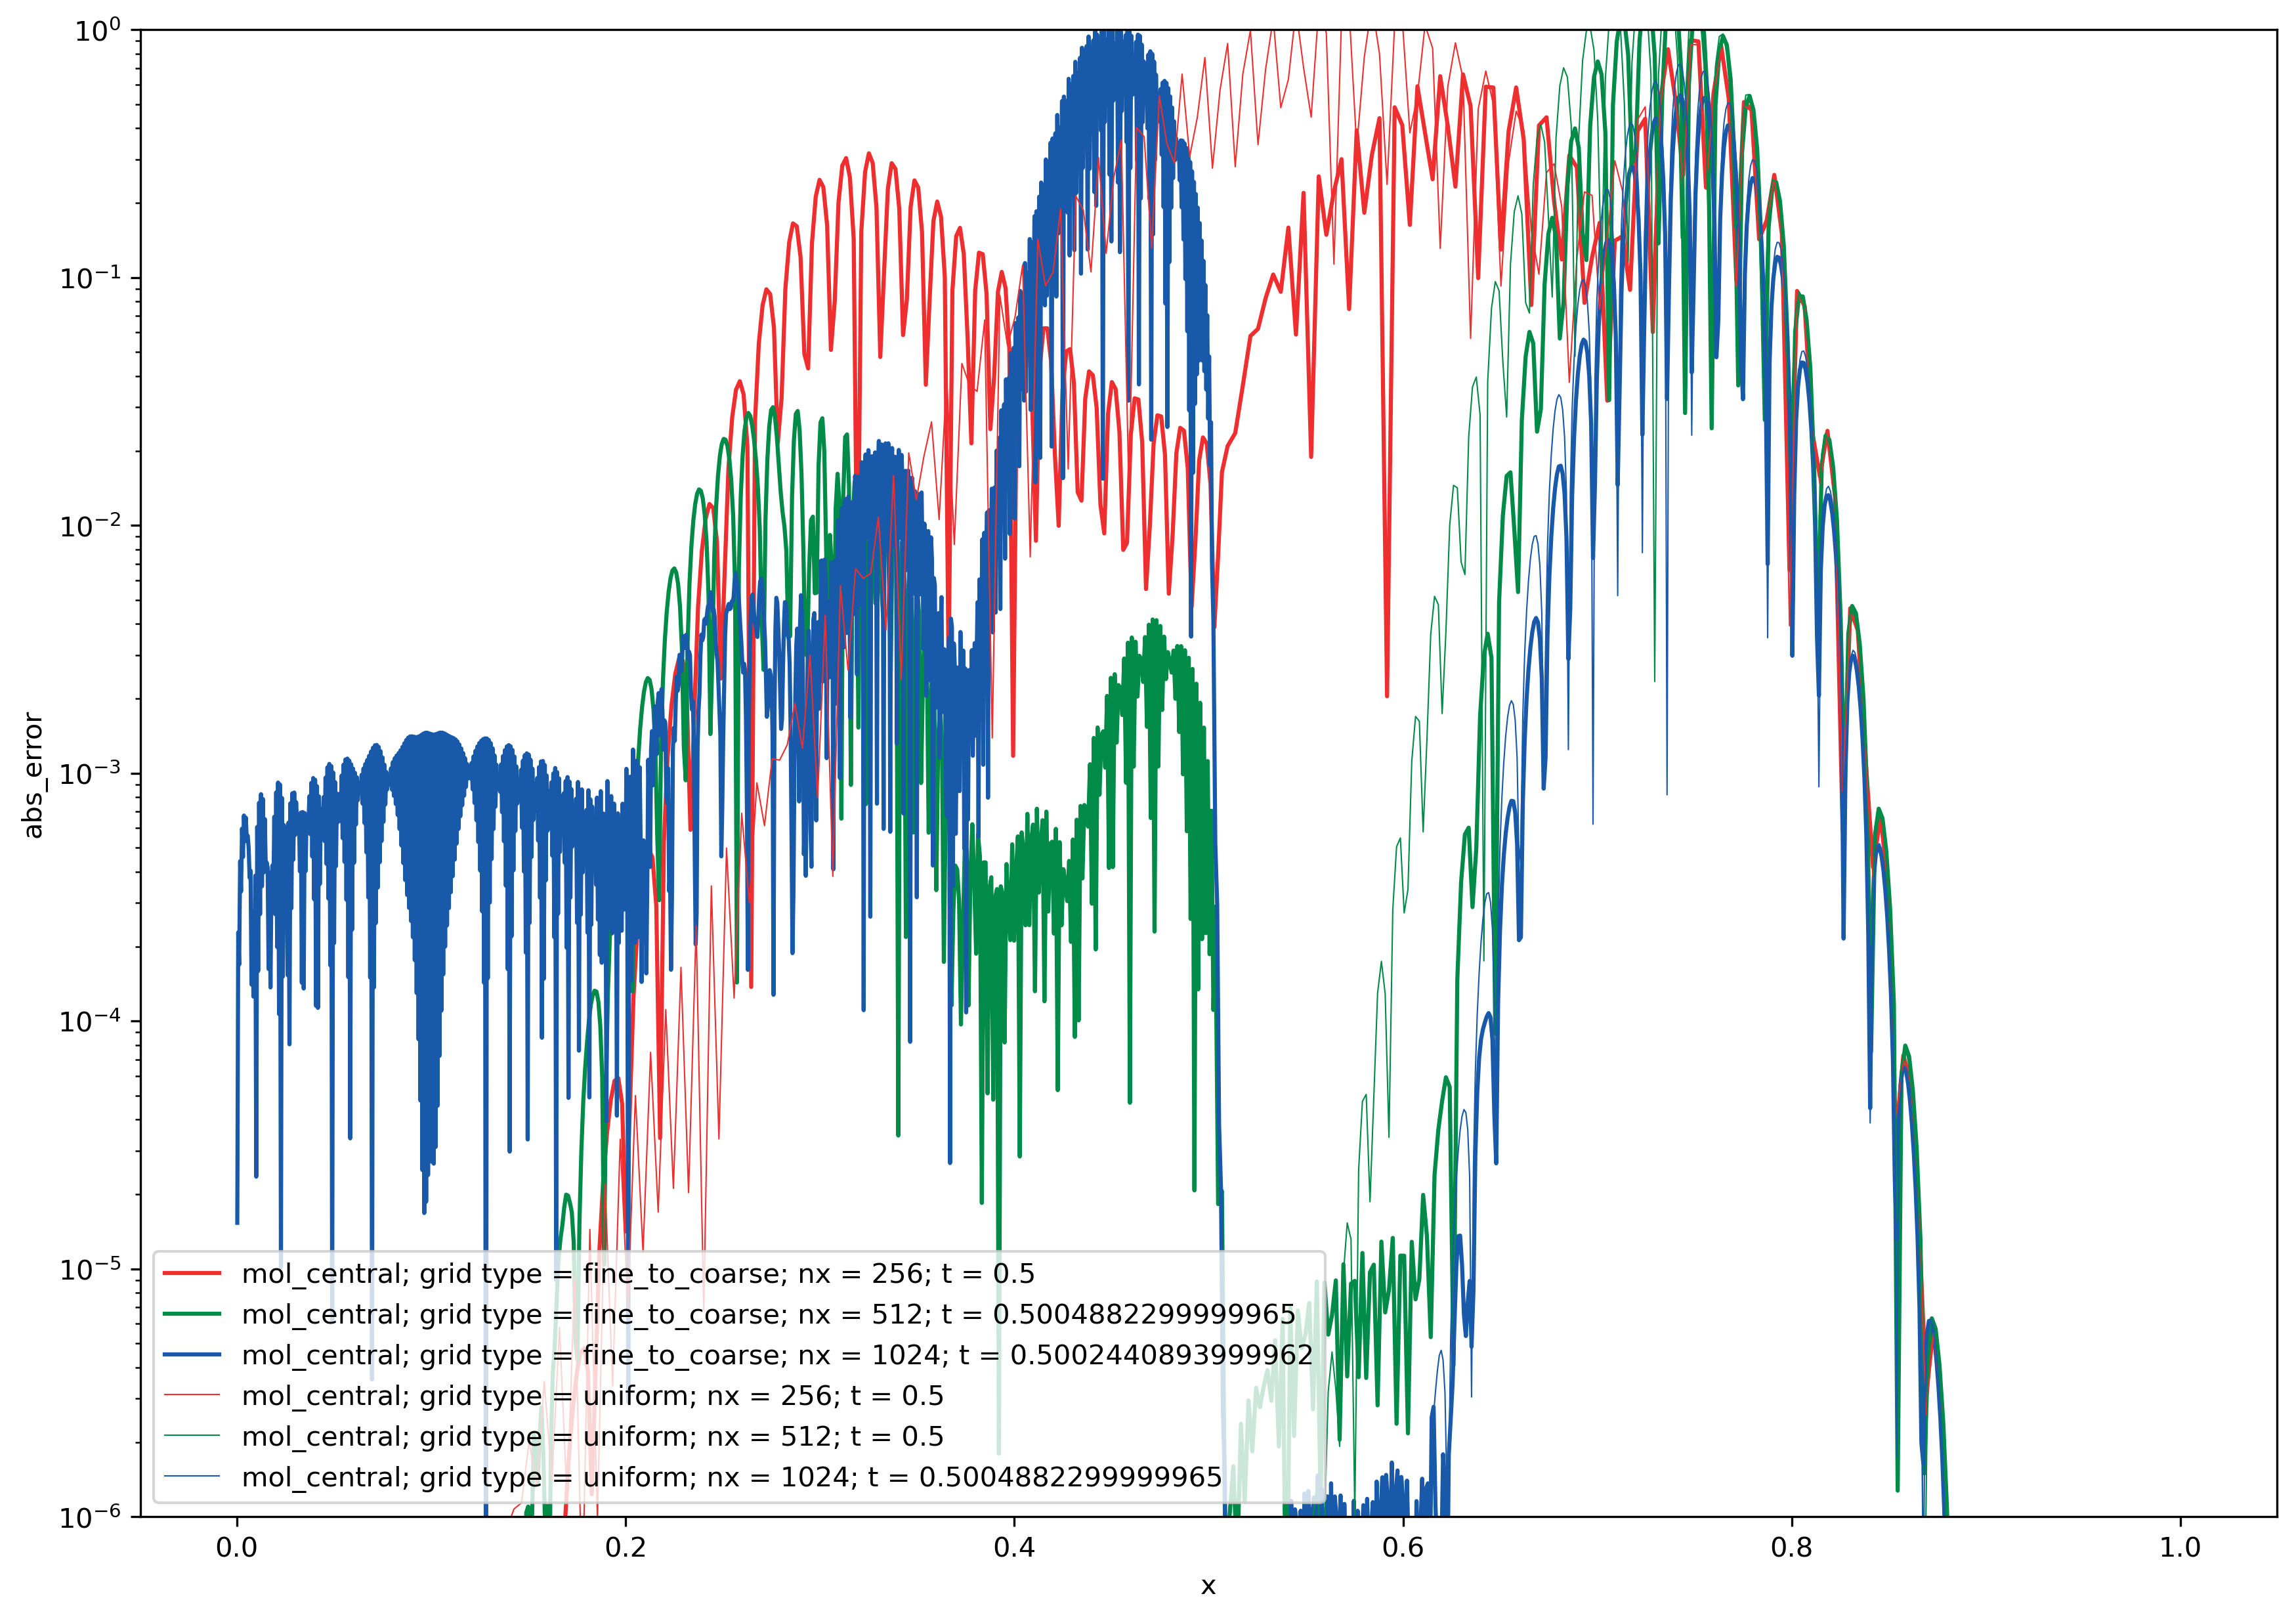

In [397]:
ax3.set_xlabel('x')
ax3.set_ylabel('abs_error')
ax3.set_title('')
ax3.legend()
ax3.set_yscale('log')
ax3.set_ylim([1e-6,1])
fig3

yt : [INFO     ] 2022-07-31 18:18:16,119 xlim = 0.000000 2.000000
yt : [INFO     ] 2022-07-31 18:18:16,120 ylim = 0.000000 2.000000
yt : [INFO     ] 2022-07-31 18:18:16,122 xlim = 0.000000 2.000000
yt : [INFO     ] 2022-07-31 18:18:16,125 ylim = 0.000000 2.000000
yt : [INFO     ] 2022-07-31 18:18:16,133 Making a fixed resolution buffer of (('boxlib', 'p')) 800 by 800
yt : [WARNING  ] 2022-07-31 18:18:16,264 Plotting ('boxlib', 'p'): Both positive and negative values. Min = -0.48980919266591577 dimensionless, Max = 0.4897494335921387 dimensionless.
yt : [WARNING  ] 2022-07-31 18:18:16,266 Switching to symlog colorbar scaling.



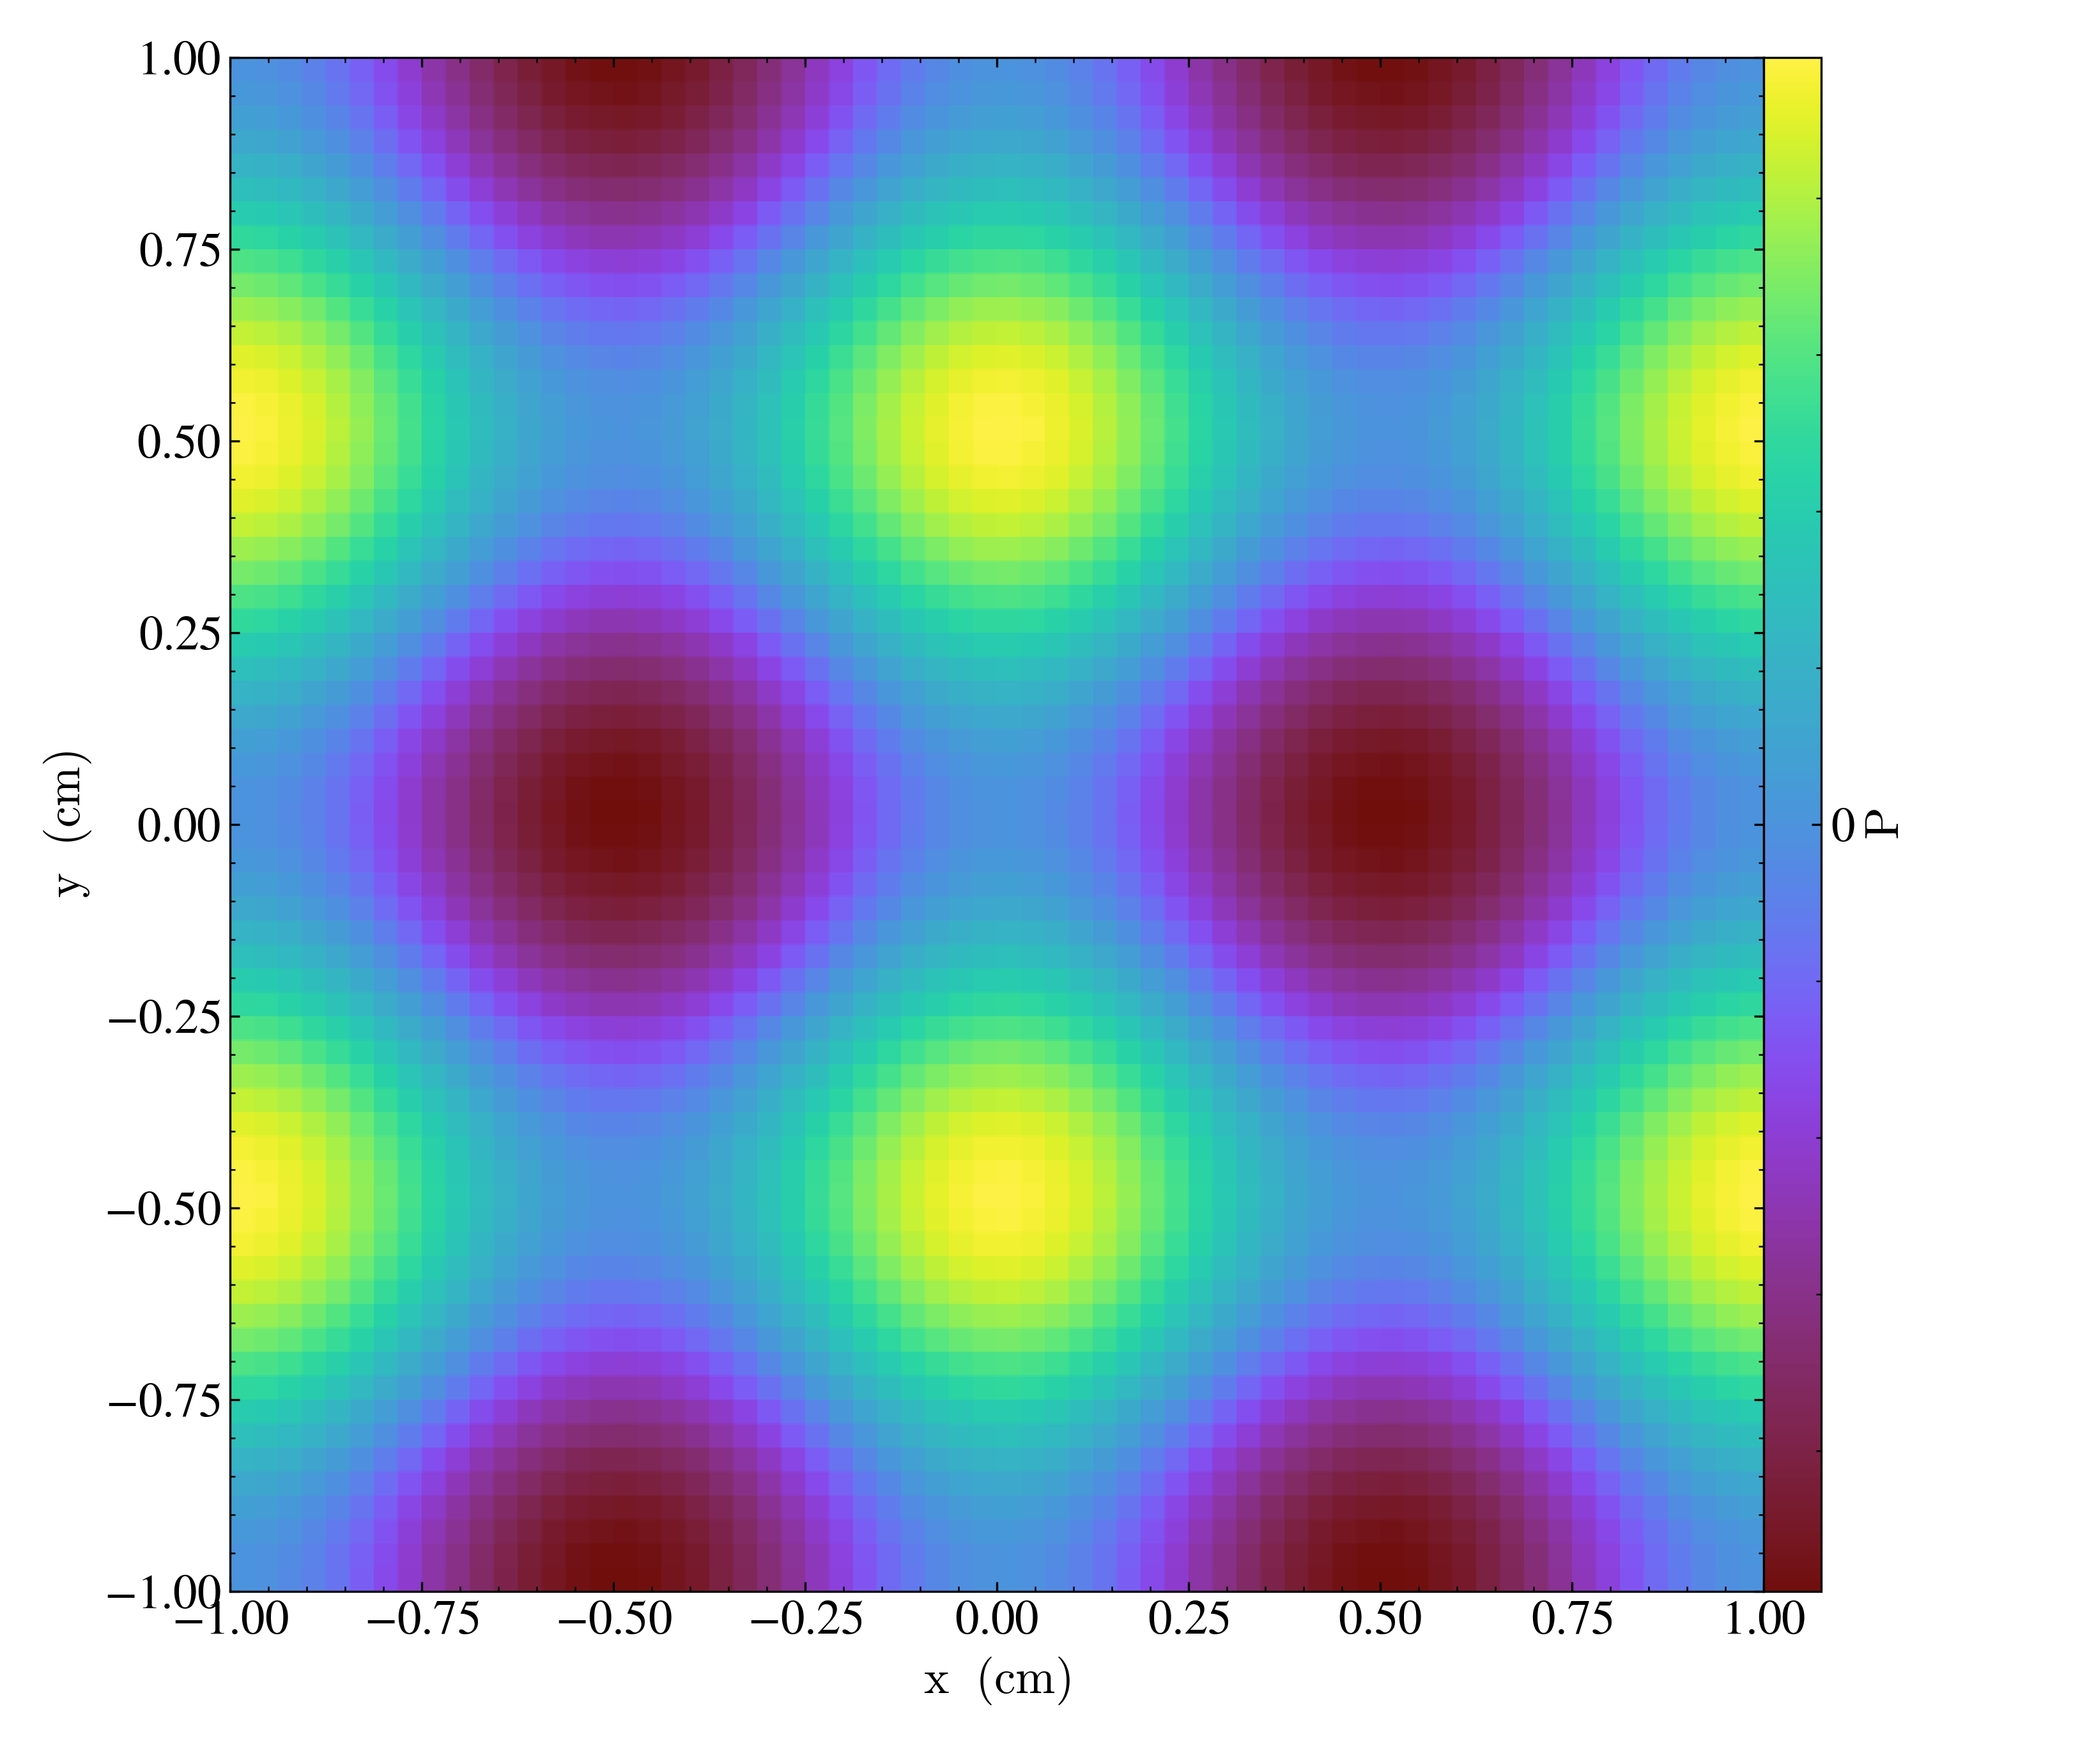

In [22]:
sliceplot = yt.SlicePlot(ds, "z", ("p")).show()